### Salman Rashid K V - DSML October Batch

## Business Case: Aerofit - Descriptive Statistics & Probability

### Business Problem

The market research team at AeroFit wants to identify the characteristics of the target audience for each type of treadmill offered by the company, to provide a better recommendation of the treadmills to the new customers. The team decides to investigate whether there are differences across the product with respect to customer characteristics.
1. Perform descriptive analytics to create a customer profile for each AeroFit treadmill product by developing appropriate tables and charts.
2. For each AeroFit treadmill product, construct two-way contingency tables and compute all conditional and marginal probabilities along with their insights/impact on the business

### Problem Statement
- Study the data set for data cleaning and preprocessing
- Detect outliers in the data set using boxplot and describe function
- Understand the distribution of data for the quantitative attributes
- Understand correlations of data among the quantitative attributes
- Univariate, bivariate & multivariate analysis to check relationship between different features
- Calculate marginal probability on each columns to find the percent of occurence
- Apply conditional probability on different features to analyse market of the products
- Calculate expected price for selling 100 products

### Data Information

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('aerofit_treadmill.csv')
df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120


#### The Data Frame have 12 columns :
- Product Purchased : KP281, KP481, or KP781
- Age : In years
- Gender : Male/Female
- Education : In years
- MaritalStatus : Single or Partnered
- Usage : The average number of times the customer plans to use the treadmill each week.
- Income : Annual income (in dollars)
- Fitness : Self-rated fitness on a 1 to 5 scale, where 1 is the poor shape and 5 is the excellent shape.
- Miles : The average number of miles the customer expects to walk/run each week

In [3]:
df.shape

(180, 9)

Number of rows : 180<br>Number of columns : 9

In [4]:
df.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')

In [5]:
df.isna().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

No null values present in any columns of the given dataset

In [6]:
df.dtypes

Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [8]:
df.Product.unique()

array(['KP281', 'KP481', 'KP781'], dtype=object)

There are 3 unique products available in the dataset

In [9]:
for i in df.columns:
    print(i,':',df[i].nunique())

Product : 3
Age : 32
Gender : 2
Education : 8
MaritalStatus : 2
Usage : 6
Fitness : 5
Income : 62
Miles : 37


In [10]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


- Minimum & Maximum age of the person is 18 & 50, mean is 28.79 and 75% of persons have age less than or equal to 33
- Most of the people are having 16 years of education, i.e. 75% of persons are having education <= 16 years
- Standard deviation for Income & Miles is very high. These variables might have the **outliers** in it

## Outliers

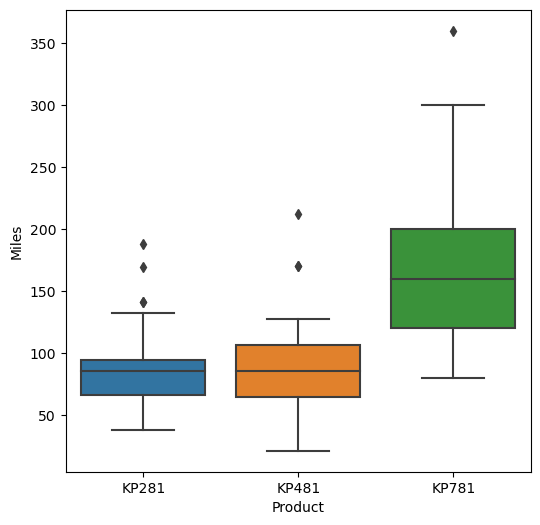

In [11]:
plt.figure(figsize=(6,6))
sns.boxplot(x = 'Product', y = 'Miles', data = df)
plt.show()

All three products have presence of outlier values in the miles column

In [12]:
df1=df.copy()

### Managing the Outliers

#### Product ID : KP281

In [13]:
kp281=df1[df1['Product']=='KP281']
kp281.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [14]:
q1_miles=kp281['Miles'].quantile(0.25)
q3_miles=kp281['Miles'].quantile(0.75)
print('The first quantile is',q1_miles)
print('The third quantile is',q3_miles)

The first quantile is 66.0
The third quantile is 94.0


In [15]:
iqr_miles=q3_miles - q1_miles
print(iqr_miles)

28.0


In [16]:
lower_miles=q1_miles-(1.5)*iqr_miles
upper_miles=q3_miles+(1.5)*iqr_miles
print('The lower limit for outliers are',lower_miles)
print('The upper limit for outliers are',upper_miles)

The lower limit for outliers are 24.0
The upper limit for outliers are 136.0


In [17]:
miles_outlier_kp281 = kp281[(kp281['Miles']<lower_miles)|(kp281['Miles']>upper_miles)]
miles_outlier_kp281

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
8,KP281,21,Male,15,Single,5,4,35247,141
23,KP281,24,Female,16,Partnered,5,5,44343,188
53,KP281,30,Male,14,Partnered,4,4,46617,141
61,KP281,34,Male,16,Single,4,5,51165,169


- Outlier values of miles in product KP281 are 141,188,141 and 169

In [18]:
miles_new_kp281 = kp281[~((kp281['Miles']<lower_miles)|(kp281['Miles']>upper_miles))]
miles_new_kp281

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
75,KP281,43,Male,16,Partnered,3,3,53439,66
76,KP281,44,Female,16,Single,3,4,57987,75
77,KP281,46,Female,16,Partnered,3,2,60261,47
78,KP281,47,Male,16,Partnered,4,3,56850,94


#### Product ID : KP481

In [19]:
kp481=df1[df1['Product']=='KP481']
kp481.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
80,KP481,19,Male,14,Single,3,3,31836,64
81,KP481,20,Male,14,Single,2,3,32973,53
82,KP481,20,Female,14,Partnered,3,3,34110,106
83,KP481,20,Male,14,Single,3,3,38658,95
84,KP481,21,Female,14,Partnered,5,4,34110,212


In [20]:
q1_miles=kp481['Miles'].quantile(0.25)
q3_miles=kp481['Miles'].quantile(0.75)
print('The first quantile is',q1_miles)
print('The third quantile is',q3_miles)

The first quantile is 64.0
The third quantile is 106.0


In [21]:
iqr_miles=q3_miles - q1_miles
print(iqr_miles)

42.0


In [22]:
lower_miles=q1_miles-(1.5)*iqr_miles
upper_miles=q3_miles+(1.5)*iqr_miles
print('The lower limit for outliers are',lower_miles)
print('The upper limit for outliers are',upper_miles)

The lower limit for outliers are 1.0
The upper limit for outliers are 169.0


In [23]:
miles_outlier = kp481[(kp481['Miles']<lower_miles)|(kp481['Miles']>upper_miles)]
miles_outlier

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
84,KP481,21,Female,14,Partnered,5,4,34110,212
103,KP481,25,Male,14,Partnered,4,3,45480,170
120,KP481,33,Male,13,Partnered,4,4,53439,170


- Outlier values of miles in product KP481 are 212 and 170

In [24]:
miles_new_kp481 = kp481[~((kp481['Miles']<lower_miles)|(kp481['Miles']>upper_miles))]
miles_new_kp481.head(10)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
80,KP481,19,Male,14,Single,3,3,31836,64
81,KP481,20,Male,14,Single,2,3,32973,53
82,KP481,20,Female,14,Partnered,3,3,34110,106
83,KP481,20,Male,14,Single,3,3,38658,95
85,KP481,21,Male,16,Partnered,2,2,34110,42
86,KP481,21,Male,12,Partnered,2,2,32973,53
87,KP481,23,Male,14,Partnered,3,3,36384,95
88,KP481,23,Male,14,Partnered,3,3,38658,85
89,KP481,23,Female,16,Single,3,3,45480,95
90,KP481,23,Male,16,Partnered,4,3,45480,127


#### Product ID : KP781

In [25]:
kp781=df1[df1['Product']=='KP781']
kp781.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
140,KP781,22,Male,14,Single,4,3,48658,106
141,KP781,22,Male,16,Single,3,5,54781,120
142,KP781,22,Male,18,Single,4,5,48556,200
143,KP781,23,Male,16,Single,4,5,58516,140
144,KP781,23,Female,18,Single,5,4,53536,100


In [26]:
q1_miles=kp781['Miles'].quantile(0.25)
q3_miles=kp781['Miles'].quantile(0.75)
print('The first quantile is',q1_miles)
print('The third quantile is',q3_miles)

The first quantile is 120.0
The third quantile is 200.0


In [27]:
iqr_miles=q3_miles - q1_miles
print(iqr_miles)

80.0


In [28]:
lower_miles=q1_miles-(1.5)*iqr_miles
upper_miles=q3_miles+(1.5)*iqr_miles
print('The lower limit for outliers are',lower_miles)
print('The upper limit for outliers are',upper_miles)

The lower limit for outliers are 0.0
The upper limit for outliers are 320.0


In [225]:
miles_outlier_kp781 = kp781[(kp781['Miles']<lower_miles)|(kp781['Miles']>upper_miles)]
miles_outlier_kp781

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
173,KP781,35,Male,16,Partnered,4,5,92131,360


- Outlier value of miles in product KP781 is 360

In [30]:
miles_new_kp781 = kp781[~((kp781['Miles']<lower_miles)|(kp781['Miles']>upper_miles))]
miles_new_kp781.head(10)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
140,KP781,22,Male,14,Single,4,3,48658,106
141,KP781,22,Male,16,Single,3,5,54781,120
142,KP781,22,Male,18,Single,4,5,48556,200
143,KP781,23,Male,16,Single,4,5,58516,140
144,KP781,23,Female,18,Single,5,4,53536,100
145,KP781,23,Male,16,Single,4,5,48556,100
146,KP781,24,Male,16,Single,4,5,61006,100
147,KP781,24,Male,18,Partnered,4,5,57271,80
148,KP781,24,Female,16,Single,5,5,52291,200
149,KP781,24,Male,16,Single,5,5,49801,160


#### Box plots for each product vs miles after removing outliers

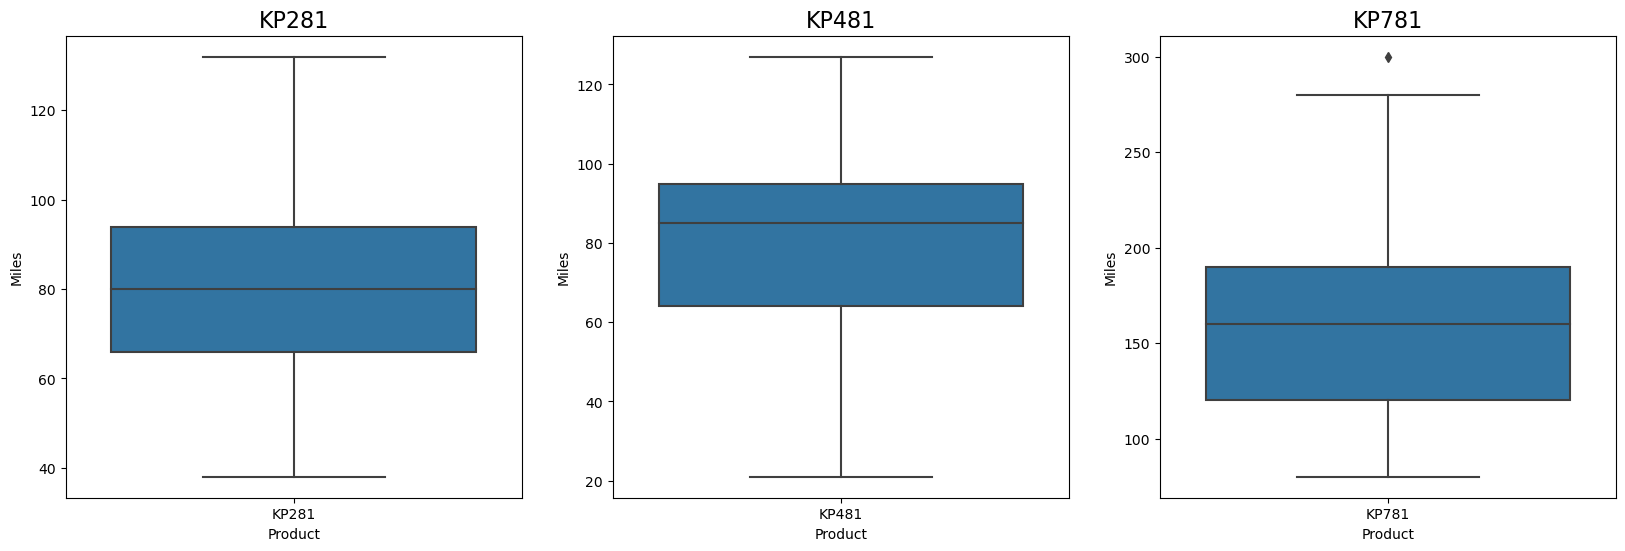

In [31]:
fig, axis = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))
sns.boxplot(x = 'Product', y = 'Miles', data = miles_new_kp281, ax=axis[0])
sns.boxplot(x = 'Product', y = 'Miles', data = miles_new_kp481, ax=axis[1])
sns.boxplot(x = 'Product', y = 'Miles', data = miles_new_kp781, ax=axis[2])

axis[0].set_title("KP281",fontsize=16)
axis[1].set_title("KP481", fontsize=16)
axis[2].set_title("KP781", fontsize=16)
plt.show()

#### Concatenating the new columns without outliers

In [33]:
miles_co = [miles_new_kp281, miles_new_kp481, miles_new_kp781] 
df_miles = pd.concat(miles_co).reset_index()
df_miles['Age'] = pd.cut(df_miles['Age'],bins=[17,24,30,36,42,48,54],labels=['18-24','24-30','30-36','36-42','42-48','48-54'])
df_miles['Income'] = pd.cut(df_miles['Income'],bins=[20000,40000,60000,80000,100000,120000],labels=['20k-40k','40k-60k','60k-80k','80k-100k','100k-120k'])
df_miles

,index,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,0,KP281,18-24,Male,14,Single,3,4,20k-40k,112
1,1,KP281,18-24,Male,15,Single,2,3,20k-40k,75
2,2,KP281,18-24,Female,14,Partnered,4,3,20k-40k,66
3,3,KP281,18-24,Male,12,Single,3,3,20k-40k,85
4,4,KP281,18-24,Male,13,Partnered,4,2,20k-40k,47
...,...,...,...,...,...,...,...,...,...,...
167,175,KP781,36-42,Male,21,Single,6,5,80k-100k,200
168,176,KP781,36-42,Male,18,Single,5,4,80k-100k,200
169,177,KP781,42-48,Male,16,Single,5,5,80k-100k,160
170,178,KP781,42-48,Male,18,Partnered,4,5,100k-120k,120


- Outliers removed dataset for the column 'miles'
- Binning done for columns Age and Income for future analysis

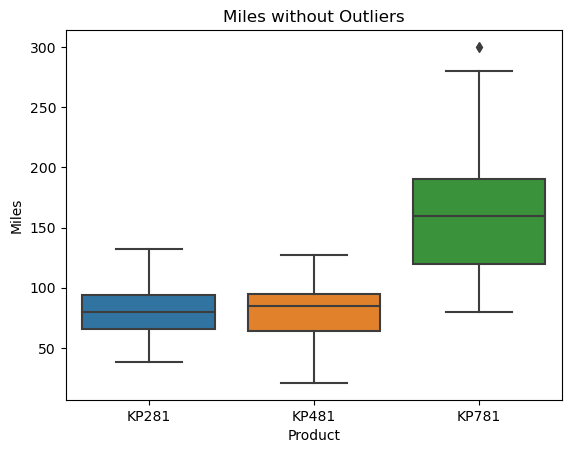

In [34]:
sns.boxplot(x = 'Product', y = 'Miles', data = df_miles)
plt.title('Miles without Outliers')
plt.show()

### Distribution of the quantitive data

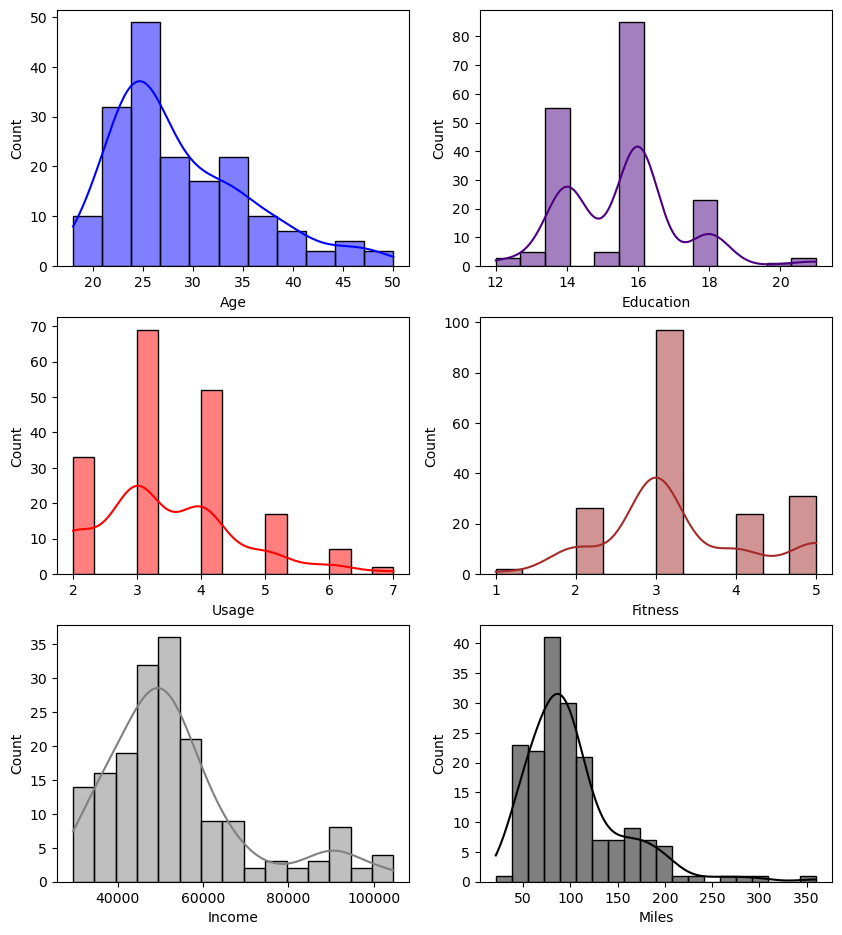

In [48]:
fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(10,8))
fig.subplots_adjust(top=1.2)
sns.histplot(data=df, x="Age", kde=True,color="blue", ax=axis[0,0])
sns.histplot(data=df, x="Education", kde=True,color="indigo", ax=axis[0,1])
sns.histplot(data=df, x="Usage", kde=True,color="red", ax=axis[1,0])
sns.histplot(data=df, x="Fitness", kde=True,color="brown", ax=axis[1,1])
sns.histplot(data=df, x="Income", kde=True,color="grey", ax=axis[2,0])
sns.histplot(data=df, x="Miles", kde=True,color="black", ax=axis[2,1])
plt.show()

- The product is used by people between ages 18 to 45 years, with most of them at 25 years of age
- Average educated people are mostly using the product. Both low and high educated people are using the product less
- Majority of the customers use the product 3 - 4 times a week
- Customers mostly scale their fitness level at a scale of 3 out of 5
- Most people using the product are having annual salary is around 30k to 60k
- Most customers runs between 50 to 125 miles per week

### Correlation of the quantitative data

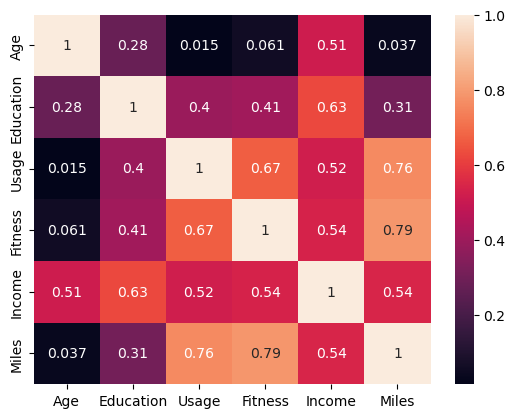

In [53]:
sns.heatmap(df.corr(), annot=True)
plt.show()

- Fitness increases with usage per week and miles running per week
- With increase in income, miles running per week has also increased : rich people tend to take care of their health more serious
- With increase in Education, miles running per week has also increased : educated people are more focused on their health compared to others
- Age does not show any linear relationship with usage per week, fitness scale or miles running per week

### Pairplot

<Figure size 800x800 with 0 Axes>

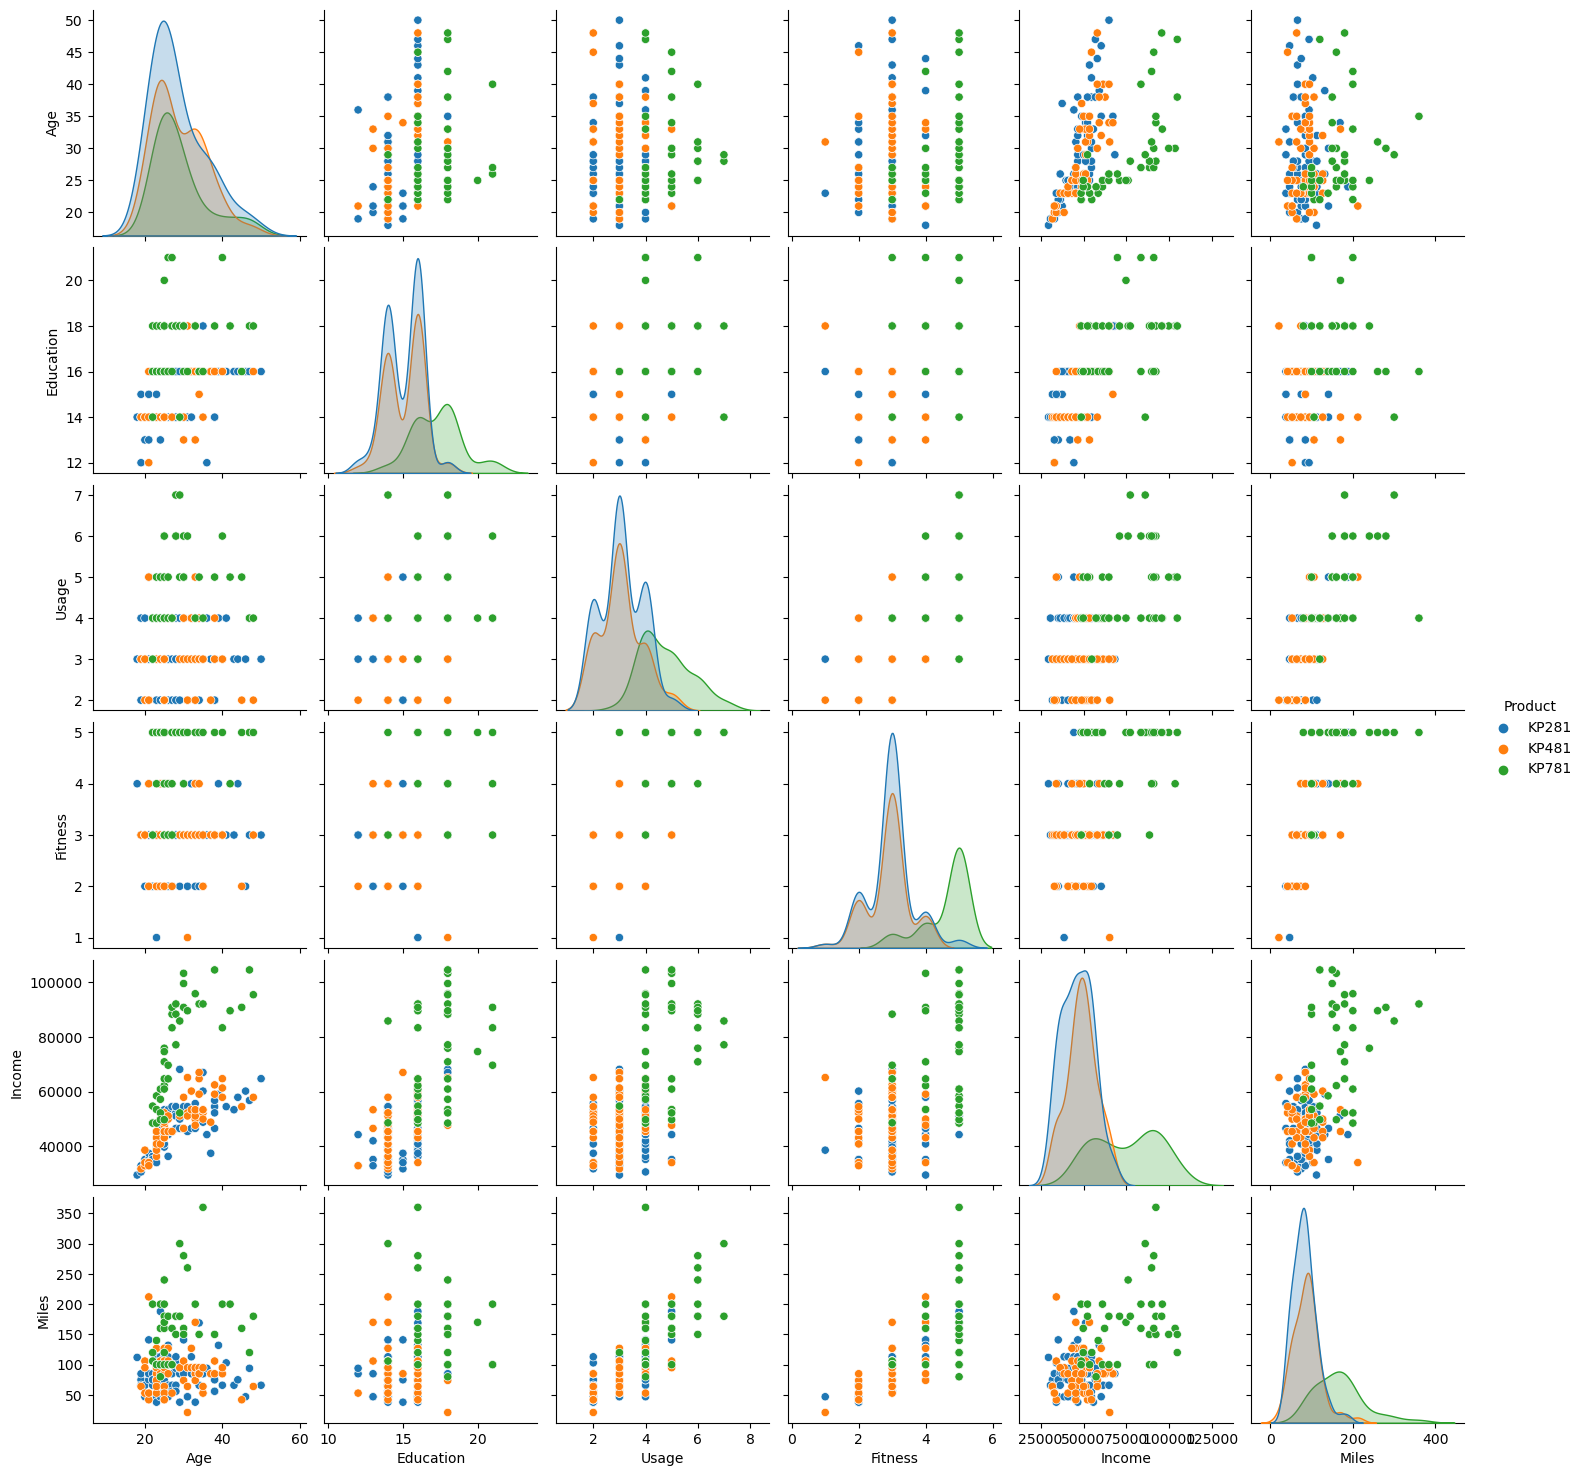

In [152]:
plt.figure(figsize=(8,8))
sns.pairplot(data = df, hue= 'Product')
plt.show()

### Univariate Analysis

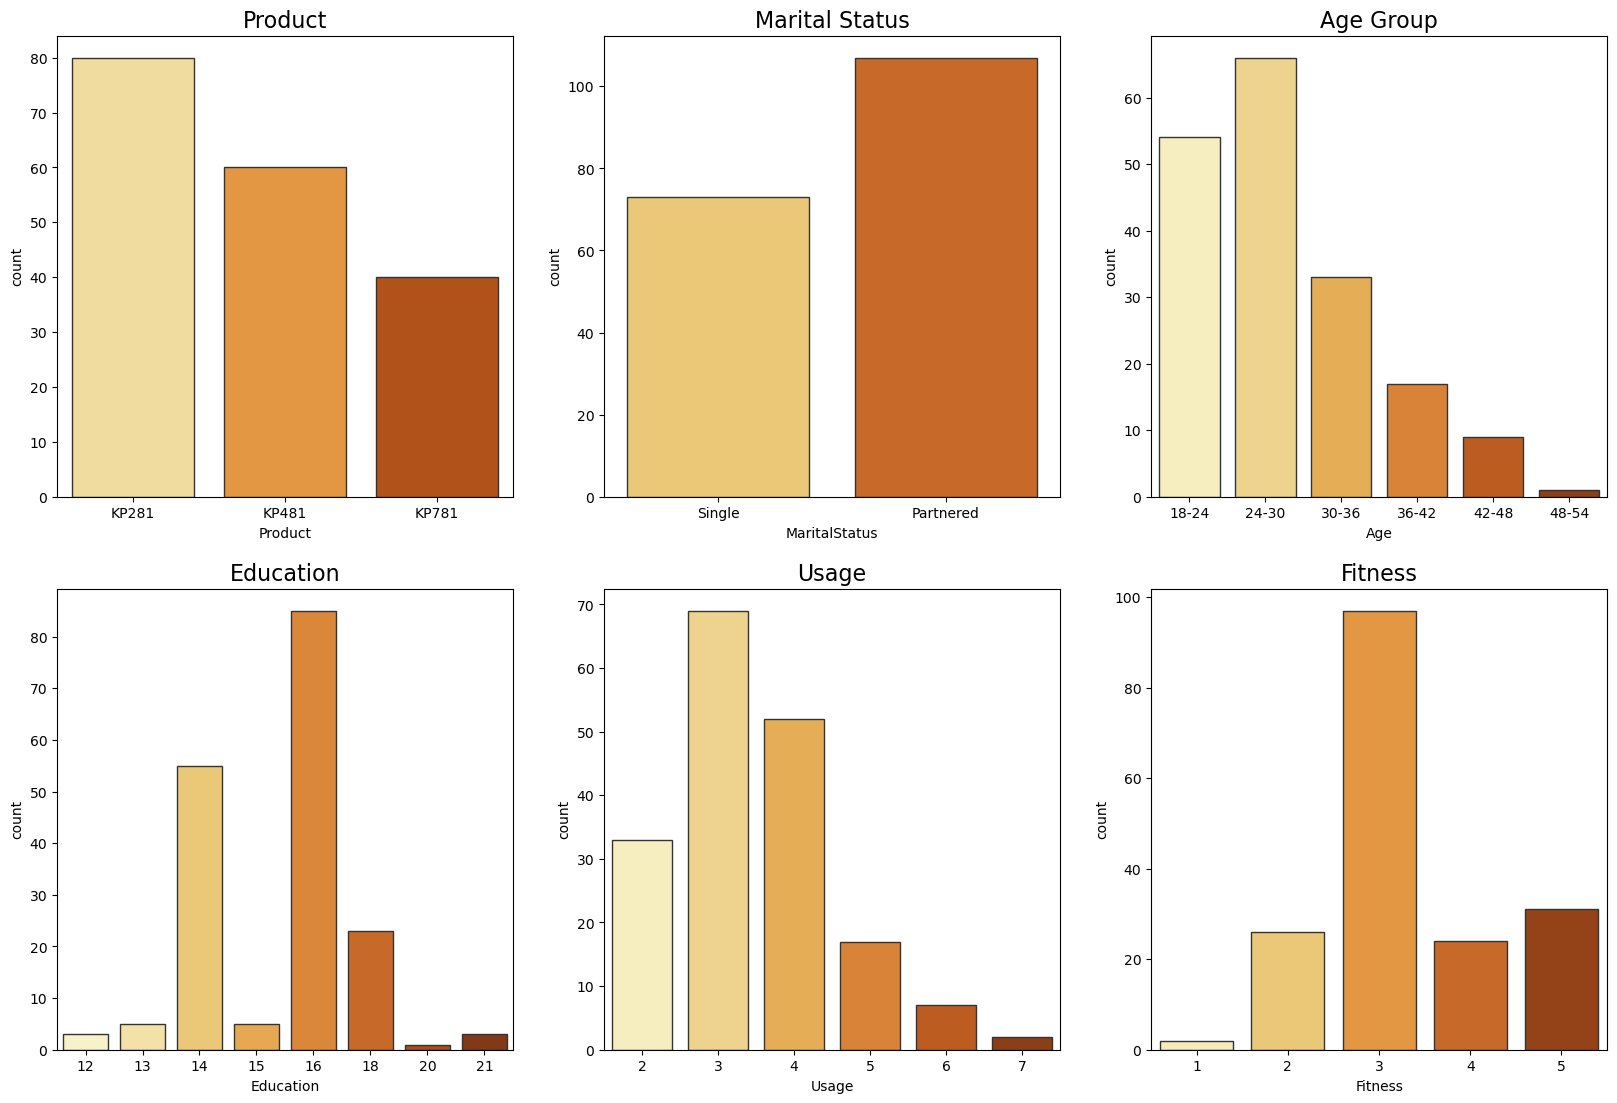

In [47]:
fig, axis = plt.subplots(nrows=2, ncols=3, figsize=(20, 6))
fig.subplots_adjust(top=1.8)
sns.countplot(data=df, x='Product',palette='YlOrBr',edgecolor='0.2', ax=axis[0,0])
sns.countplot(data=df, x='MaritalStatus',palette='YlOrBr',edgecolor='0.2', ax=axis[0,1])
sns.countplot(data=df1, x='Age',palette='YlOrBr',edgecolor='0.2', ax=axis[0,2])
sns.countplot(data=df, x='Education',palette='YlOrBr',edgecolor='0.2', ax=axis[1,0])
sns.countplot(data=df, x='Usage',palette='YlOrBr',edgecolor='0.2', ax=axis[1,1])
sns.countplot(data=df1, x='Fitness',palette='YlOrBr',edgecolor='0.2', ax=axis[1,2])

axis[0,0].set_title("Product",fontsize=16)
axis[0,1].set_title("Marital Status", fontsize=16)
axis[0,2].set_title("Age Group", fontsize=16)
axis[1,0].set_title("Education", fontsize=16)
axis[1,1].set_title("Usage", fontsize=16)
axis[1,2].set_title("Fitness", fontsize=16)
plt.show()

- KP281 is the popular among the three products, followed by KP481 & then KP781
- The customers are mostly partnered rather than being single for both genders
- The age group between 24 to 30 is more popular among customers followed by 18 to 24 group
- Most customer who buy the product have atleast finished 14 or 16 years of education
- Customers who bought the products have used it on average of 3 to 4 times per week 
- Fitness scale 3 is the most achieved scale out of 5 by the customers

#### Gender of the customers

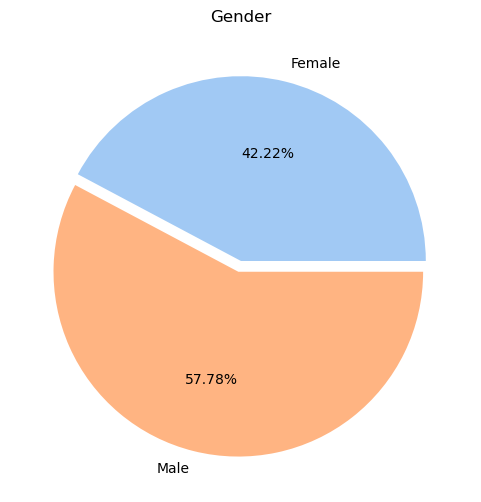

In [36]:
palette_color = sns.color_palette('pastel')
plt.figure(figsize=(6,6))
df_gcount=df.groupby(['Gender']).aggregate({'Product':'count'}).reset_index()
plt.pie(df_gcount['Product'],explode=(0,0.06), labels=df_gcount['Gender'], colors=palette_color,autopct='%.2f%%')
plt.title('Gender')
plt.show()

- Male to Female ratio is 58:42 for the customers of different products
- Male customers are higher compared to Female customers    

#### Marital Status of the customers

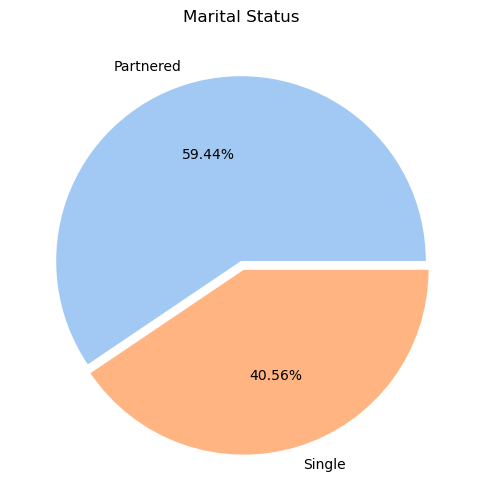

In [37]:
palette_color = sns.color_palette('pastel')
plt.figure(figsize=(6,6))
df_mcount=df.groupby(['MaritalStatus']).aggregate({'Gender':'count'}).reset_index()
plt.pie(df_mcount['Gender'],explode=(0,0.05), labels=df_mcount['MaritalStatus'], colors=palette_color,autopct='%.2f%%')
plt.title('Marital Status')
plt.show()

- Partnered to single customers share ratio of 60:40 among both genders
- Partnered customers are higher than that of single customers    

#### Products purchased among the customers

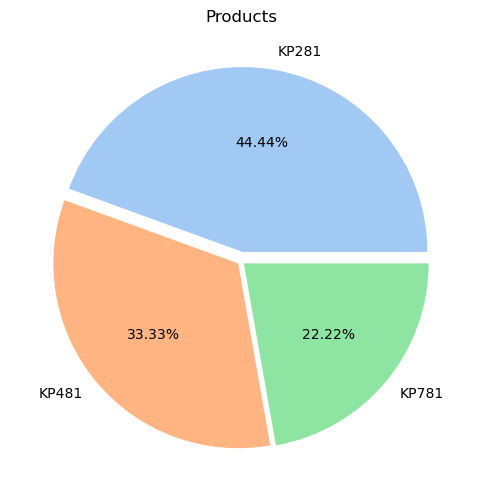

In [38]:
palette_color = sns.color_palette('pastel')
plt.figure(figsize=(6,6))
df_pcount=df.groupby(['Product']).aggregate({'Gender':'count'}).reset_index()
plt.pie(df_pcount['Gender'],explode=(0.05,0.02,0.02), labels=df_pcount['Product'], colors=palette_color,autopct='%.2f%%')
plt.title('Products')
plt.show()

- KP281 is the popular product across the customers followed by KP481 then KP781

In [39]:
df1['Age'] = pd.cut(df1['Age'],bins=[17,24,30,36,42,48,54],labels=['18-24','24-30','30-36','36-42','42-48','48-54'])

#### Age group of the customers

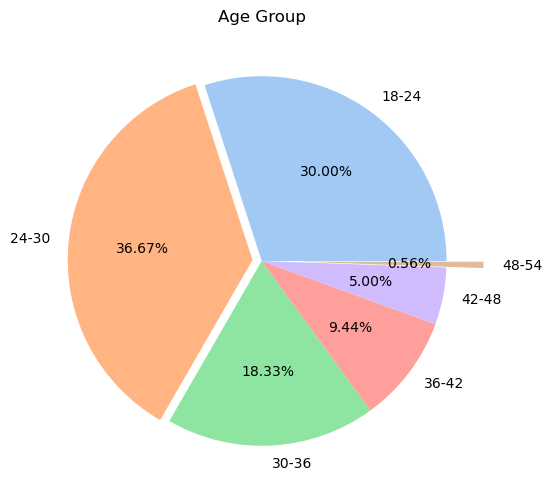

In [211]:
palette_color = sns.color_palette('pastel')
plt.figure(figsize=(6,6))
df_acount=df1.groupby(['Age']).aggregate({'Gender':'count'}).reset_index()
plt.pie(df_acount['Gender'],explode=(0,0.05,0,0,0,0.2), labels=df_acount['Age'], colors=palette_color,autopct='%.2f%%')
plt.title('Age Group')
plt.show()

- The two of the most active customers are within the age group of 18 to 30 years old

#### Education of the customers

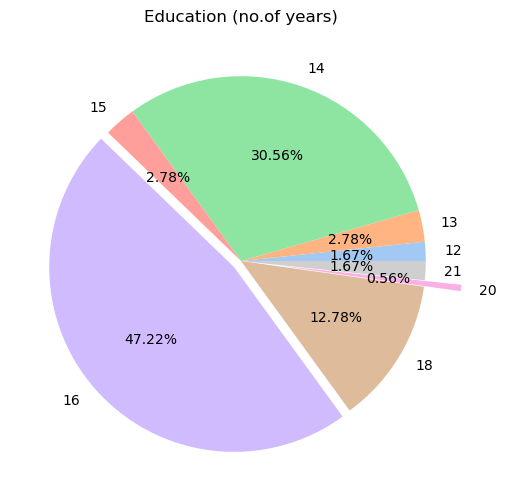

In [212]:
palette_color = sns.color_palette('pastel')
plt.figure(figsize=(6,6))
df_ecount=df1.groupby(['Education']).aggregate({'Gender':'count'}).reset_index()
plt.pie(df_ecount['Gender'],explode=(0,0,0,0,0.05,0,0.2,0), labels=df_ecount['Education'], colors=palette_color,autopct='%.2f%%')
plt.title('Education (no.of years)')
plt.show()

- Customers who finished either 14 or 16 years of education tend to purchase the more products

#### Usage of the products by the customers

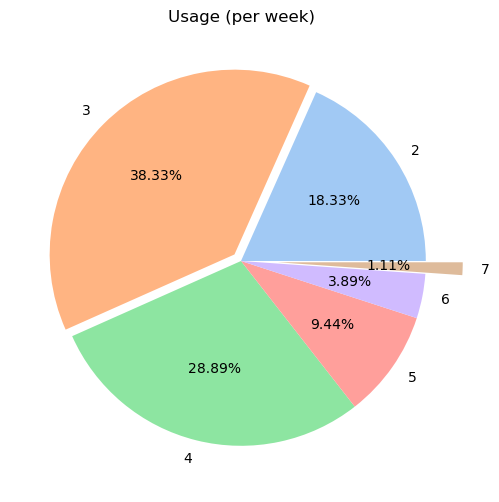

In [213]:
palette_color = sns.color_palette('pastel')
plt.figure(figsize=(6,6))
df_ucount=df.groupby(['Usage']).aggregate({'Gender':'count'}).reset_index()
plt.pie(df_ucount['Gender'],explode=(0,0.05,0,0,0,0.2), labels=df_ucount['Usage'], colors=palette_color,autopct='%.2f%%')
plt.title('Usage (per week)')
plt.show()

- Most customers tend to use the product 3 or 4 times per week. Chances for them to use 7 times per week is the least

#### Fitness of the customers

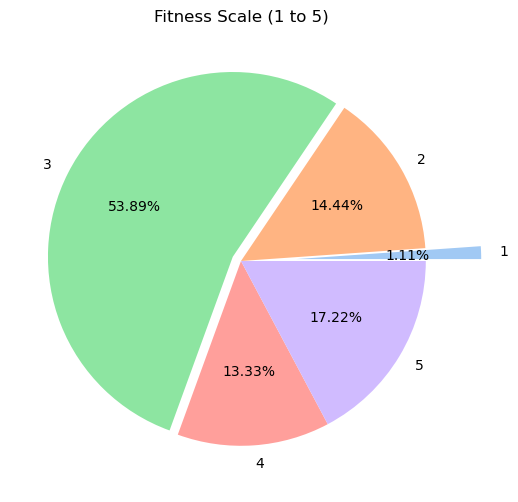

In [214]:
palette_color = sns.color_palette('pastel')
plt.figure(figsize=(6,6))
df_fcount=df.groupby(['Fitness']).aggregate({'Gender':'count'}).reset_index()
plt.pie(df_fcount['Gender'],explode=(0.3,0,0.05,0,0), labels=df_fcount['Fitness'], colors=palette_color,autopct='%.2f%%')
plt.title('Fitness Scale (1 to 5)')
plt.show()

- Customers mostly rate their fitness at a level of 3 out of 5, with 1 being the least occuring

#### Annual income of the customers

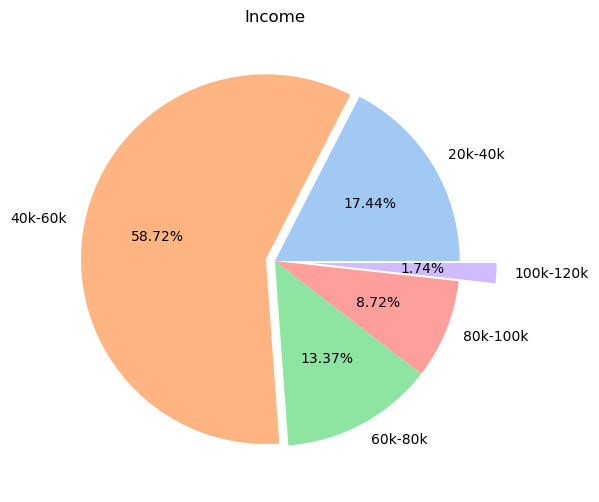

In [215]:
palette_color = sns.color_palette('pastel')
plt.figure(figsize=(6,6))
df_icount=df_miles.groupby(['Income']).aggregate({'Gender':'count'}).reset_index()
plt.pie(df_icount['Gender'],explode=(0,0.05,0,0,0.2), labels=df_icount['Income'], colors=palette_color,autopct='%.2f%%')
plt.title('Income')
plt.show()

- Most customers who buy products are having annual salary between 40k to 60k. Number of rich people who bought the products are the least

### Bivariate Analysis

#### Relation between product and gender

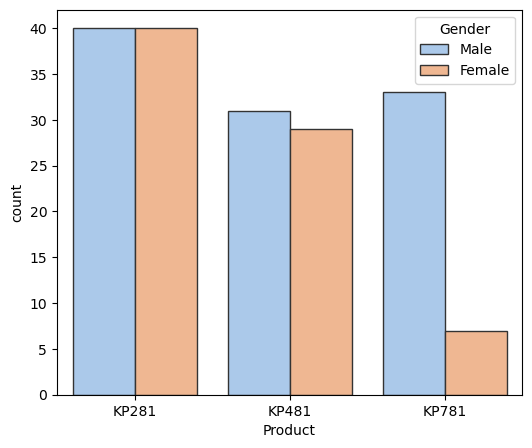

In [221]:
plt.figure(figsize=(6,5))
sns.countplot(x = 'Product', data = df, palette='pastel',edgecolor='0.2', hue='Gender')
plt.show()

- Equal number of males and females have purchased KP281 product and Almost same for the product KP481
- Most of the Male customers have purchased the KP781 product


#### Relation between product and marital status

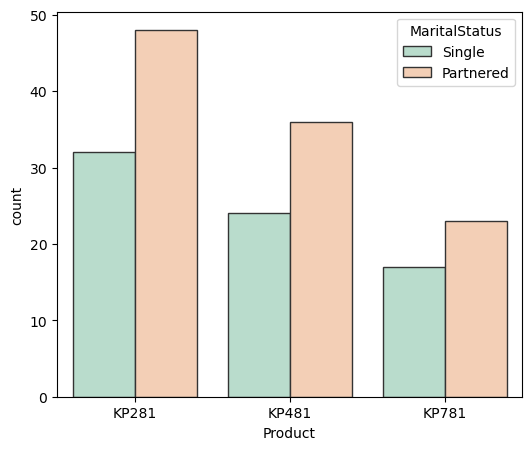

In [220]:
plt.figure(figsize=(6,5))
sns.countplot(x = 'Product', data = df, palette='Pastel2', edgecolor='0.2', hue='MaritalStatus')
plt.show()

- Customer who are partnered, is more likely to purchase the product.

#### Relation between product and income

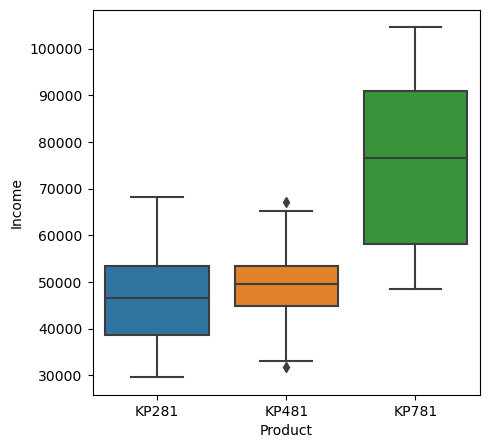

In [163]:
plt.figure(figsize=(5,5))
sns.boxplot(x = 'Product', y = 'Income', data = df)
plt.show()

- High income customers prefer buying the product KP781
- Low and medium income customers prefer buying products KP281 and KP481

In [121]:
df_income_p=df_miles.groupby(['Product','Income']).aggregate({'Gender':'count'}).reset_index()
df_income_p.pivot('Product','Income','Gender')

Income,20k-40k,40k-60k,60k-80k,80k-100k,100k-120k
Product,,,,,
KP281,22,48,6,0,0
KP481,8,42,7,0,0
KP781,0,11,10,15,3


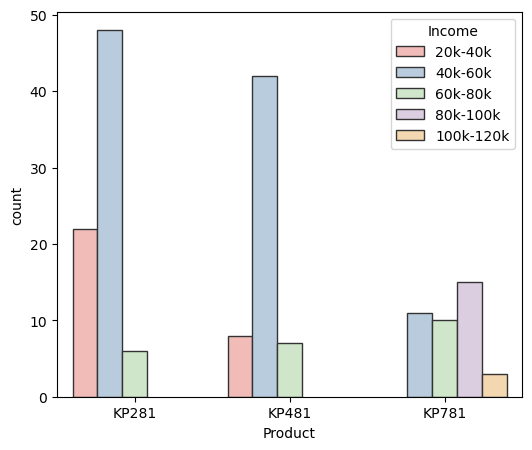

In [218]:
plt.figure(figsize=(6,5))
sns.countplot(x = 'Product', data = df_miles, palette='Pastel1', edgecolor='0.2', hue='Income')
plt.show()

- As the annual income of goes higher, more customers tend to buy the product KP781
- Customers with low income buy products KP281 and KP481
- Most of the customers are having low to medium annual income

#### Relation between product and age group

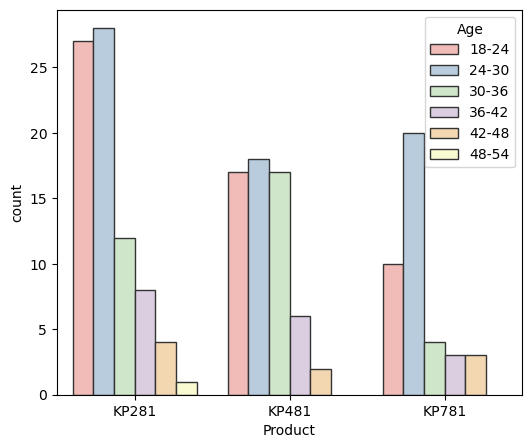

In [219]:
plt.figure(figsize=(6,5))
sns.countplot(x = 'Product', data = df1, palette='Pastel1', edgecolor='0.2', hue='Age')
plt.show()

- For products KP281, KP481 and KP781, highest number of customers are from the age group of 24 to 30 followed by that of age group 18 to 24
- The senior customers of age from 42 to 54 mostly bought product KP281, followed by KP481 then KP781

#### Joint plot between usage and fitness

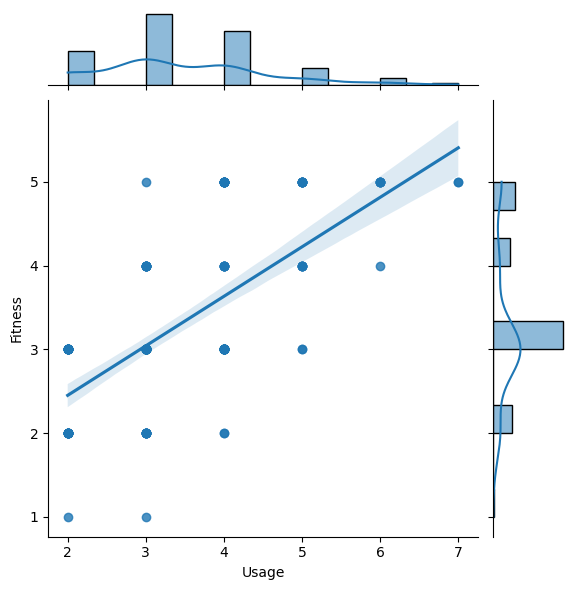

In [201]:
sns.jointplot(x= 'Usage', y = 'Fitness', data= df, kind='reg')
plt.show()

- Fitness scale increases along with the usage of product per week
- Most usage by customers are recorded at 3 times per week and scale 3 is the highest observed fitness level

#### Joint plot between usage and miles

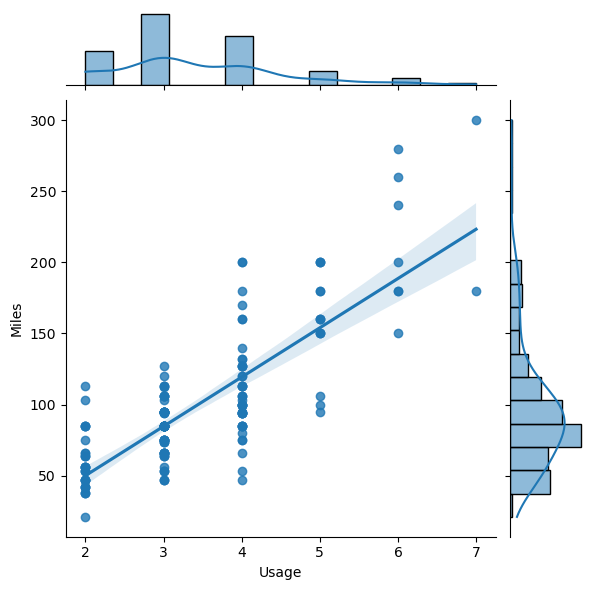

In [147]:
sns.jointplot(x= 'Usage', y = 'Miles', data= df_miles, kind='reg')
plt.show()

- Density for usage of products are higher on 2 to 3 times per week
- Miles travelled per week increases along with the usage of product per week
- Most customers have running distance between 50 to 150 miles per week

#### Joint plot between education and miles

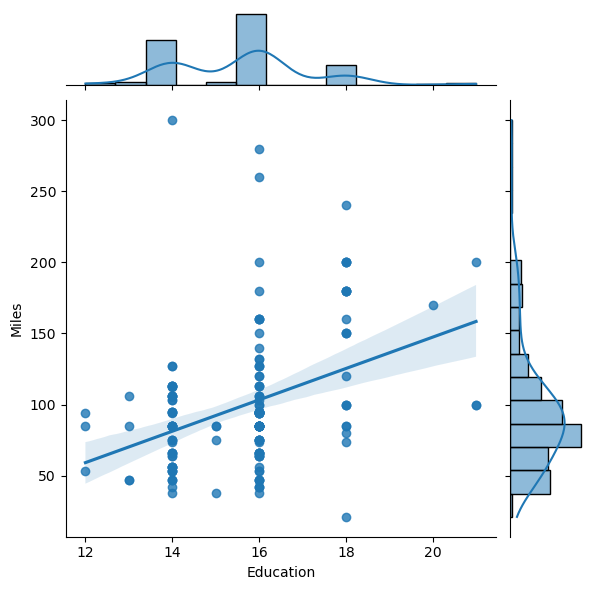

In [58]:
sns.jointplot(x= 'Education', y = 'Miles', data= df_miles, kind='reg')
plt.show()

- Miles travelled per week shows increasing trend with the education
- The density is higher for education of customers at 14 and 16 years
- Most customers have running distance between 50 to 150 miles per week

### Multivariate Analysis

#### Relationship of both product and gender with other columns

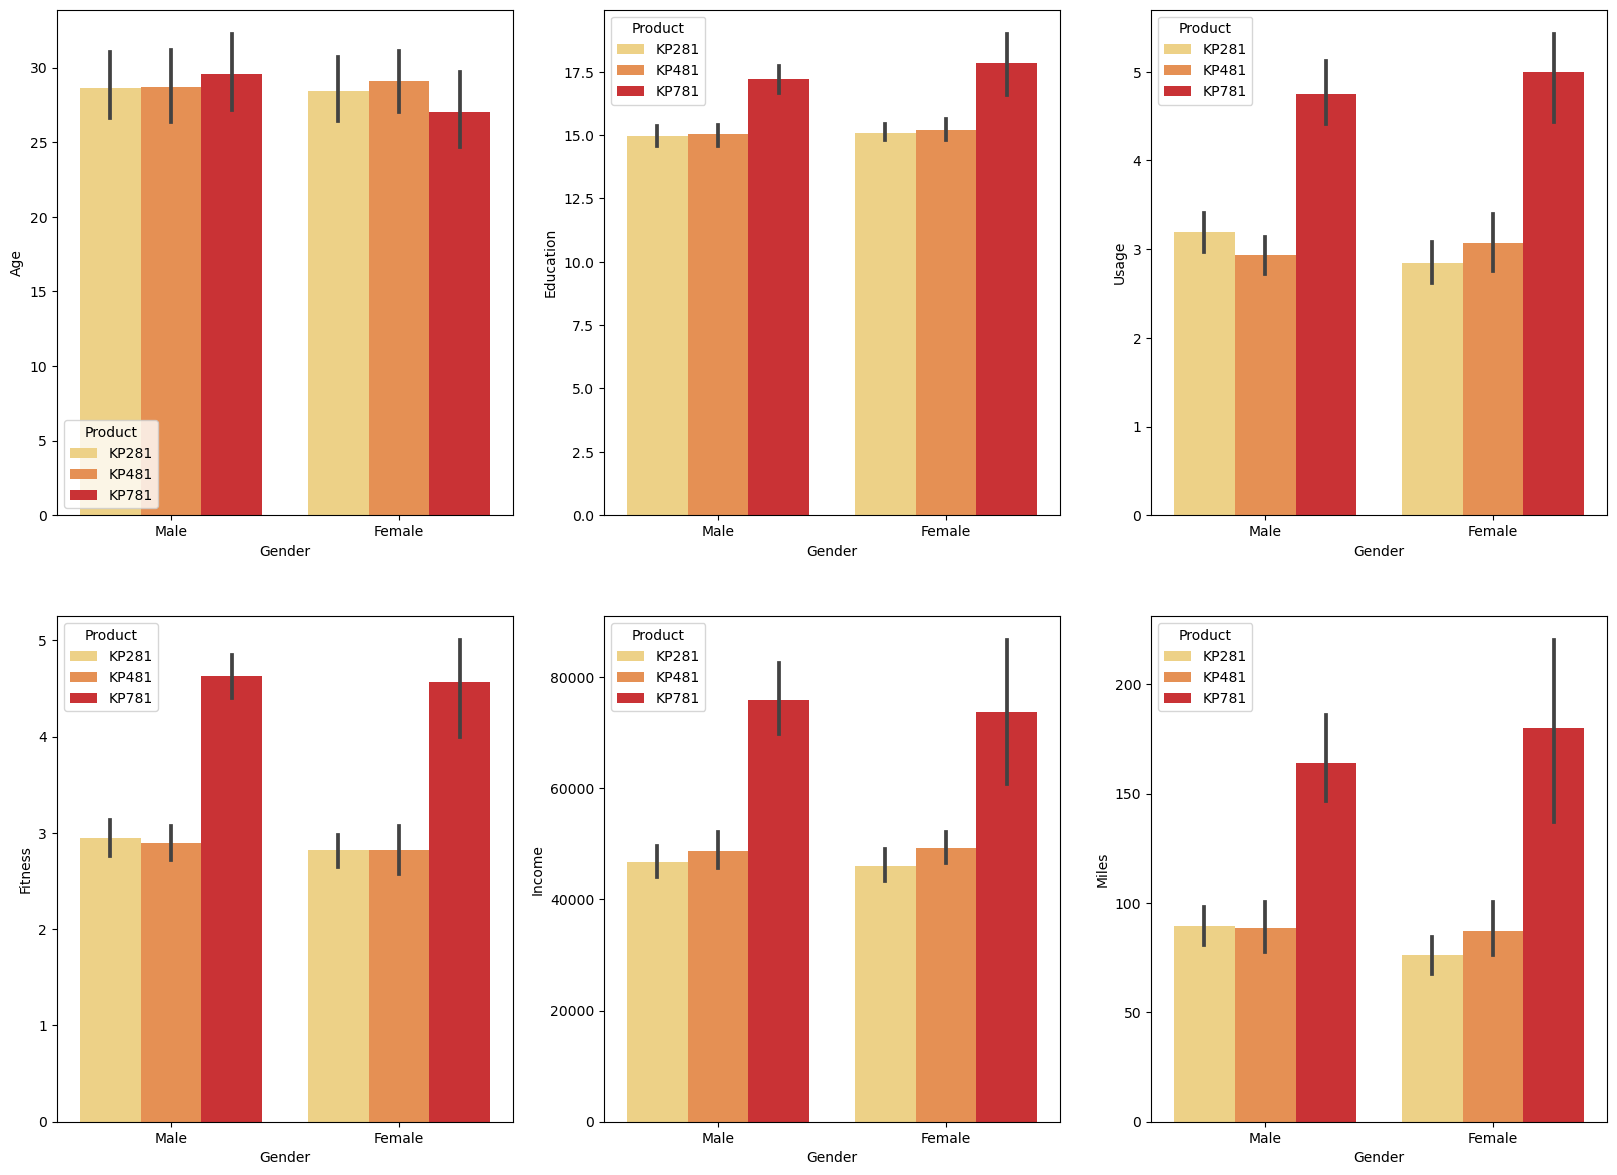

In [144]:
fig, axis = plt.subplots(nrows=2, ncols=3, figsize=(20,8))
fig.subplots_adjust(top=1.5)

sns.barplot(x='Gender',y='Age',data=df, palette="YlOrRd", hue='Product',ax=axis[0,0])
sns.barplot(x='Gender',y='Education',data=df,palette="YlOrRd",hue='Product', ax=axis[0,1])
sns.barplot(x='Gender',y='Usage',data=df_miles,palette="YlOrRd",hue='Product', ax=axis[0,2])
sns.barplot(x='Gender',y='Fitness',data=df_miles,palette="YlOrRd",hue='Product', ax=axis[1,0])
sns.barplot(x='Gender',y='Income',data=df1,palette="YlOrRd", hue='Product',ax=axis[1,1])
sns.barplot(x='Gender',y='Miles',data=df1,palette="YlOrRd", hue='Product',ax=axis[1,2])

plt.show()


- Customers purchasing products KP281 & KP481 fall into almost same age group
- As age progress men are likely to buy KP781 product, whereas for female they prefer KP481

- Customers whose Education is greater than 16, have more chances to purchase the KP781
- The customers with Education less than 16 have equal chances of purchasing KP281 or KP481

- Customers who are planning to use the treadmill greater than 4 times a week, are more likely to purchase the KP781<br>The other customers are likely to purchasing KP281 or KP481

- The more the customer is fit (fitness >= 3), higher the chances of the customer to purchase the KP781 

- Higher the Income of the customer (Income >= 60000), higher the chances of the customer to purchase the KP781

- If the customer expects to walk/run greater than 120 Miles per week, it is more likely that the customer will buy KP781

### Probability

#### Marginal Probability

**a) Products**

In [61]:
a=df['Product'].value_counts(normalize=True)
a

KP281    0.444444
KP481    0.333333
KP781    0.222222
Name: Product, dtype: float64

P(KP281) = 0.45<br>
P(KP481) = 0.33<br>
P(KP781) = 0.22


**b) Gender**

In [62]:
b=df['Gender'].value_counts(normalize=True)
b

Male      0.577778
Female    0.422222
Name: Gender, dtype: float64

P(Male) = 0.58<br>
P(Female) = 0.42



**c) Marital Status**

In [63]:
c=df['MaritalStatus'].value_counts(normalize=True)
c

Partnered    0.594444
Single       0.405556
Name: MaritalStatus, dtype: float64

P(Partnered) = 0.6<br>
P(Single) = 0.4

**d) Age**

In [64]:
d=df1['Age'].value_counts(normalize=True)
d

24-30    0.366667
18-24    0.300000
30-36    0.183333
36-42    0.094444
42-48    0.050000
48-54    0.005556
Name: Age, dtype: float64

P(24-30) = 0.37<br>
P(18-24) = 0.30<br>
P(30-36) = 0.18<br>
P(36-42) = 0.09<br>
P(42-48) = 0.05<br>
P(48-54) = 0.01

**e) Income**

In [65]:
e=df_miles['Income'].value_counts(normalize=True)
e

40k-60k      0.587209
20k-40k      0.174419
60k-80k      0.133721
80k-100k     0.087209
100k-120k    0.017442
Name: Income, dtype: float64

P(40k-60k) = 0.59<br>
P(20k-40k) = 0.17<br>
P(60k-80k) = 0.13<br>
P(80k-100k) = 0.09<br>
P(100k-120k) = 0.02

**f) Fitness**

In [66]:
f=df['Fitness'].value_counts(normalize=True)
f

3    0.538889
5    0.172222
2    0.144444
4    0.133333
1    0.011111
Name: Fitness, dtype: float64

P(3) = 0.54<br>
P(5) = 0.17<br>
P(2) = 0.14<br>
P(4) = 0.13<br>
P(1) = 0.01

**g) Usage**

In [67]:
g=df['Usage'].value_counts(normalize=True)
g

3    0.383333
4    0.288889
2    0.183333
5    0.094444
6    0.038889
7    0.011111
Name: Usage, dtype: float64

P(3) = 0.38<br>
P(4) = 0.29<br>
P(2) = 0.18<br>
P(5) = 0.09<br>
P(6) = 0.04<br>
P(7) = 0.01

**h) Education**

In [68]:
h=df1['Education'].value_counts(normalize=True)
h

16    0.472222
14    0.305556
18    0.127778
15    0.027778
13    0.027778
12    0.016667
21    0.016667
20    0.005556
Name: Education, dtype: float64

P(16) = 0.47<br>
P(14) = 0.31<br>
P(18) = 0.13<br>
P(15) = 0.03<br>
P(13) = 0.03<br>
P(12) = 0.01<br>
P(21) = 0.01<br>
P(20) = 0.01

### Subplotting the marginal probabilities

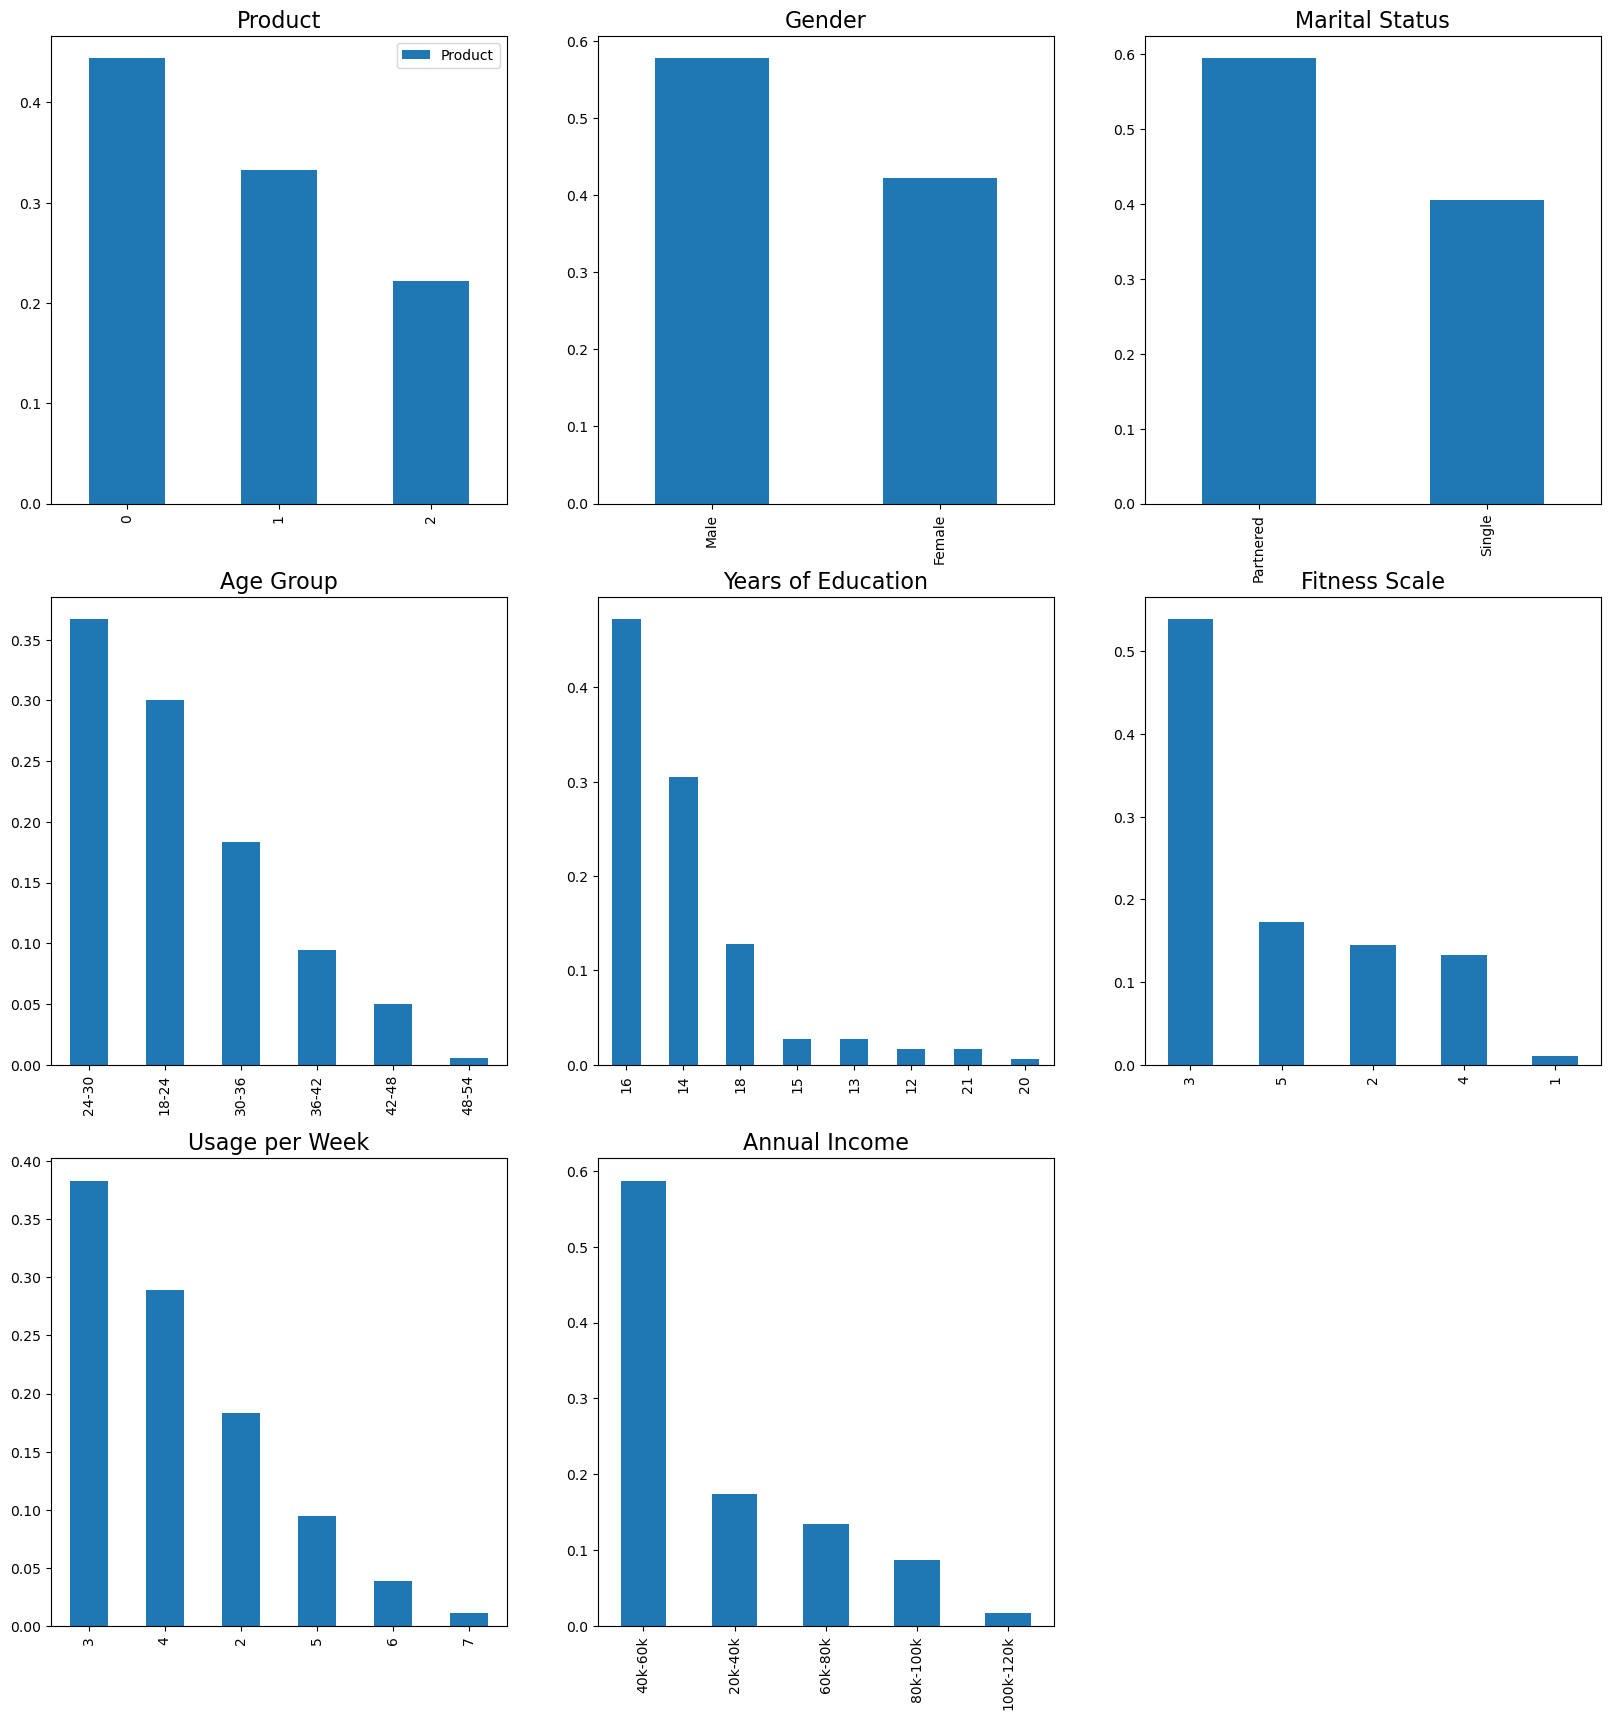

In [210]:
fig, axis = plt.subplots(nrows=3, ncols=3, figsize=(20,10))
fig.subplots_adjust(top=1.7)

a.plot(kind="bar",ax=axis[0,0])
b.plot(kind="bar",ax=axis[0,1])
c.plot(kind="bar",ax=axis[0,2])
d.plot(kind="bar",ax=axis[1,0])
f.plot(kind="bar",ax=axis[1,2])
g.plot(kind="bar",ax=axis[2,0])
h.plot(kind="bar",ax=axis[1,1])
e.plot(kind="bar",ax=axis[2,1])

axis[0,0].set_title("Product",fontsize=16)
axis[0,1].set_title("Gender", fontsize=16)
axis[0,2].set_title("Marital Status", fontsize=16)
axis[1,0].set_title("Age Group", fontsize=16)
axis[1,1].set_title("Years of Education", fontsize=16)
axis[1,2].set_title("Fitness Scale", fontsize=16)
axis[2,0].set_title("Usage per Week", fontsize=16)
axis[2,1].set_title("Annual Income", fontsize=16)
axis[2,2].axis('off')

plt.show()


- Probability of people buying product KP281 is high compared to both KP481 & KP781
- Probability of random customer to be male is higher compared to that of female customers
- Probability of occurence  for a random customer to be married is higher than being single
- Chances of customers age to occur in between 18 to 30 is higher compared to other age groups
- Customer having 16 years education has highest probability to occur follwed by 14 and 18 years
- The chances of customer to have fitness scale 3 is significantly higher than any other scale out of 5
- Customers who plan to use the treadmill 3 times a week has the most chance of occurence
- Probability of a customer to have an annual salary in the range of 40k to 60k is very high

### Conditional Probability

#### Probability of each product given age

In [223]:
df_product_age=pd.crosstab(df1.Age,df1.Product,normalize = 'index')

#df_product_age['(KP281/Age)']=df_product_age['KP281']/df_product_age['All']
#df_product_age['(KP481/Age)']=df_product_age['KP481']/df_product_age['All']
#df_product_age['(KP781/Age)']=df_product_age['KP781']/df_product_age['All']

df_product_age.round(3)

Product,KP281,KP481,KP781
Age,,,
18-24,0.500,0.315,0.185
24-30,0.424,0.273,0.303
30-36,0.364,0.515,0.121
36-42,0.471,0.353,0.176
42-48,0.444,0.222,0.333
48-54,1.000,0.000,0.000


- The probability of KP281 for most given ages are higher compared to KP481 and KP781, So all aged people are equally
prefers KP281
- Probability of KP481 for given age 30 to 36 is higher than the other products and reaches zero for older people aged between 48 to 54
- The customers between the age group 48 to 54 only buys the KP281 product

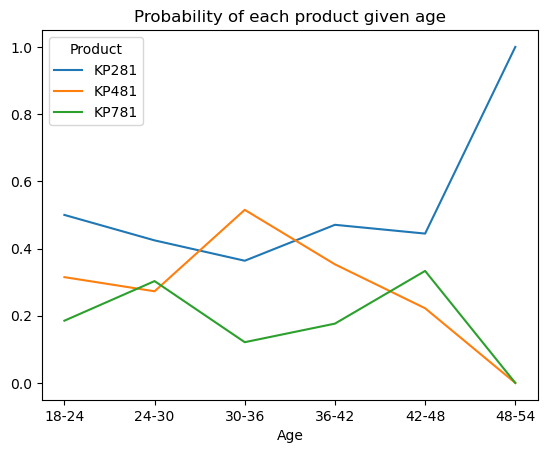

In [71]:
pga = df_product_age.plot(kind="line")
plt.title('Probability of each product given age')
plt.show()

#### Probability of each product given gender

In [72]:
df_gender_product=pd.crosstab(df.Gender,df.Product,normalize = 'index')
df_gender_product.round(3)

Product,KP281,KP481,KP781
Gender,,,
Female,0.526,0.382,0.092
Male,0.385,0.298,0.317


- For both given genders of male and female, the probability of occurence of each product is highest for KP281
- For female customers, they prefer KP71 the least, whereas for male they prefer KP481 & KP781 in almost similar ratio

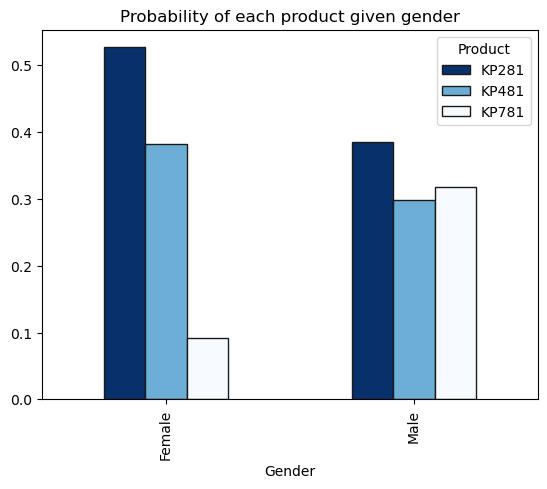

In [73]:
pgg = df_gender_product.plot(kind="bar",colormap='Blues_r',edgecolor='0.1')
plt.title('Probability of each product given gender')
plt.show()

#### Probability of each product given marital status

In [74]:
df_product_marital=pd.crosstab(df.MaritalStatus,df.Product,normalize = 'index')
df_product_marital.round(3)

Product,KP281,KP481,KP781
MaritalStatus,,,
Partnered,0.449,0.336,0.215
Single,0.438,0.329,0.233


- The probability of each product given marital status behaves similar for both partnered and single customers
- In both cases the chances for occurence is highest for product KP281 and least for product KP781

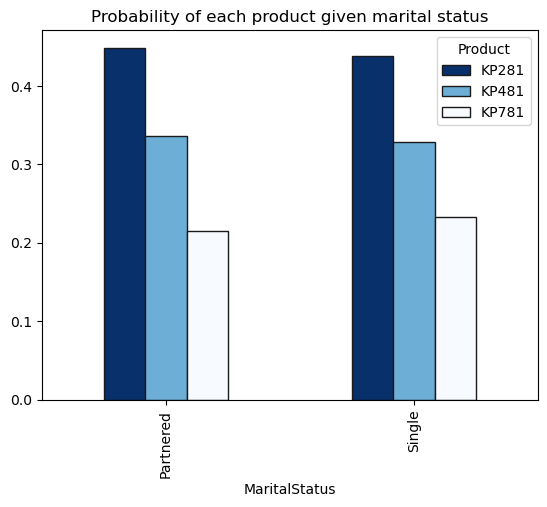

In [75]:
pgm = df_product_marital.plot(kind="bar",colormap='Blues_r',edgecolor='0.1')
plt.title('Probability of each product given marital status')
plt.show()

#### Probability of each product given years of education

In [76]:
df_education_product=pd.crosstab(df.Education,df.Product,normalize = 'index')
df_education_product.round(3)

Product,KP281,KP481,KP781
Education,,,
12,0.667,0.333,0.000
13,0.600,0.400,0.000
14,0.545,0.418,0.036
15,0.800,0.200,0.000
16,0.459,0.365,0.176
18,0.087,0.087,0.826
20,0.000,0.000,1.000
21,0.000,0.000,1.000


- The probability for product KP281 to occur is highest when eduaction is happened for 15 years and have zero occurences for 20 and 21 years
- For product KP481, the highest chances occur for customers with education of 13 and 14 years and have zero occurences at 20 and 21 years
- Customers who studied more than 18 years preferred the product KP781. This product have zero occurences for customers with less educatiom

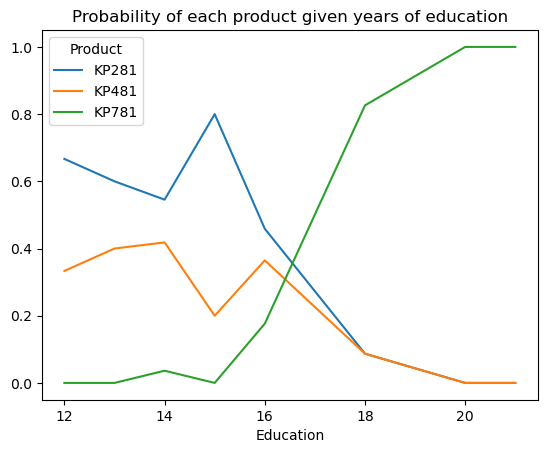

In [77]:
pge = df_education_product.plot(kind="line")
plt.title('Probability of each product given years of education')
plt.show()

#### Probability of each fitness scale given product

In [78]:
df_fitness_product=pd.crosstab(df.Product,df.Fitness,normalize = 'index')
df_fitness_product.round(3)

Fitness,1,2,3,4,5
Product,,,,,
KP281,0.012,0.175,0.675,0.112,0.025
KP481,0.017,0.200,0.650,0.133,0.000
KP781,0.000,0.000,0.100,0.175,0.725


- For both given products KP281 & KP481 the probability for occurence is highest at fitness scale 3 out of 5
- For given product KP781, the customer shows highest interest at fitness scale of 5 out of 5

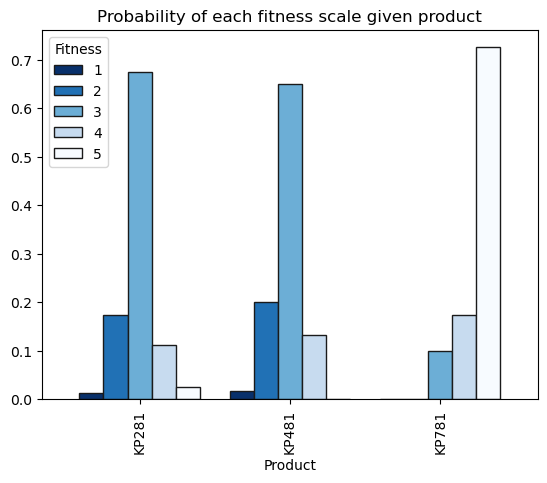

In [79]:
fgp = df_fitness_product.plot(kind="bar",colormap='Blues_r',edgecolor='0.1',width=0.8)
plt.title('Probability of each fitness scale given product')
plt.show()

#### Probability of usage per week given product

In [80]:
df_usage_product=pd.crosstab(df.Product,df.Usage,normalize = 'index')
df_usage_product.round(3)

Usage,2,3,4,5,6,7
Product,,,,,,
KP281,0.238,0.462,0.275,0.025,0.000,0.00
KP481,0.233,0.517,0.200,0.050,0.000,0.00
KP781,0.000,0.025,0.450,0.300,0.175,0.05


- For both given products KP281 & KP481 the probability for occurence is highest at product usage of 3 times per week
- Whereas for given product KP781, the customer shows highest interest at product usage of 4 or 5 times per week

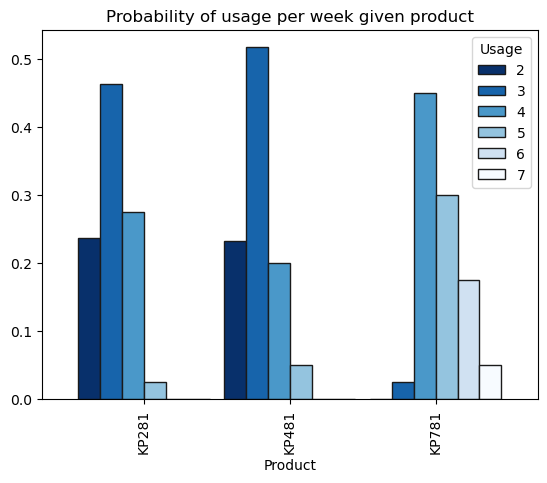

In [81]:
ugp = df_usage_product.plot(kind="bar",colormap='Blues_r',edgecolor='0.1',width=0.9)
plt.title('Probability of usage per week given product')
plt.show()

#### Probability of each product given annual income

In [83]:
df_product_income=pd.crosstab(df_miles.Income,df_miles.Product,normalize = 'index')
df_product_income.round(3)

Product,KP281,KP481,KP781
Income,,,
20k-40k,0.733,0.267,0.000
40k-60k,0.475,0.416,0.109
60k-80k,0.261,0.304,0.435
80k-100k,0.000,0.000,1.000
100k-120k,0.000,0.000,1.000


- Product KP281 have higher chances given lowest income at 20k to 40k and decreases to zero occurence towards higher income
- For product KP481, high probability is in between given income of 40k to 80k and falls to zero at higher income
- KP781 chances moves from zero and peaks at highest value for given maximum possible income of the customers

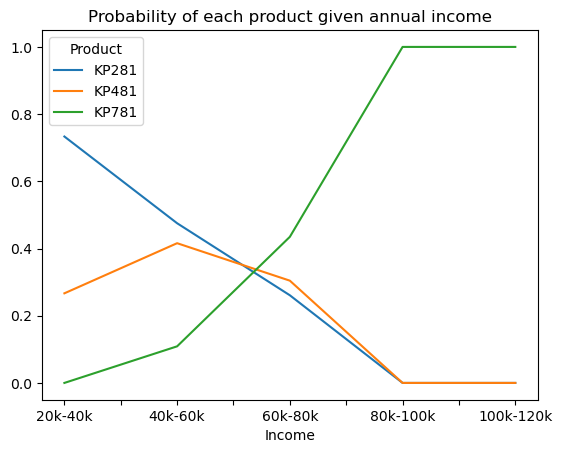

In [84]:
pgi = df_product_income.plot(kind="line")
plt.title('Probability of each product given annual income')
plt.show()

#### Probability of each fitness scale given marital status

In [85]:
df_fitness_marital=pd.crosstab(df.MaritalStatus,df.Fitness, normalize = 'index')
df_fitness_marital.round(3)

Fitness,1,2,3,4,5
MaritalStatus,,,,,
Partnered,0.009,0.168,0.533,0.121,0.168
Single,0.014,0.110,0.548,0.151,0.178


- The probability of each fitness scale for given marital status is highest at 3 out of 5 for both single and partnered customers
- Both cases follow similar trend howerver for partnered customers, ocuurence of fitness levels 2 and 5 have same probability

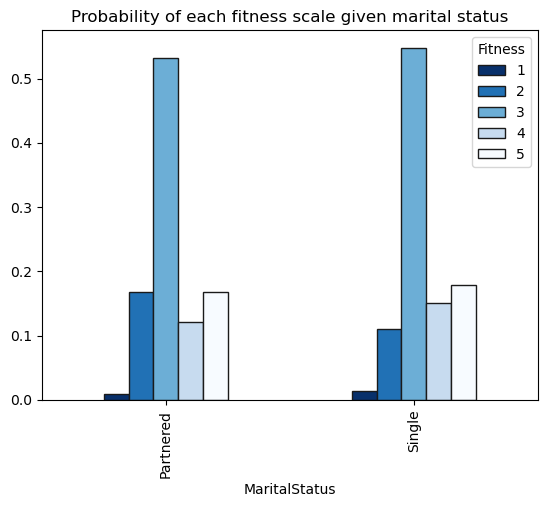

In [86]:
fgm = df_fitness_marital.plot(kind="bar",colormap='Blues_r',edgecolor='0.1')
plt.title('Probability of each fitness scale given marital status')
plt.show()

#### Probability of each fitness scale given usage per week

In [87]:
df_fitness_usage=pd.crosstab(df.Usage,df.Fitness, normalize = 'index')
df_fitness_usage.round(3)

Fitness,1,2,3,4,5
Usage,,,,,
2,0.030,0.424,0.545,0.000,0.000
3,0.014,0.145,0.681,0.145,0.014
4,0.000,0.038,0.577,0.135,0.250
5,0.000,0.000,0.118,0.353,0.529
6,0.000,0.000,0.000,0.143,0.857
7,0.000,0.000,0.000,0.000,1.000


- The chances for occurence of higher fitness scale happens at higher given product usage per week
- For given product usage until 4 times per week, scale 3 occurs with more probability, after that scale 4 occur the highest
- At highest product usage per week at 7 times, there is only occurence of fitness scale at 5 out of 5

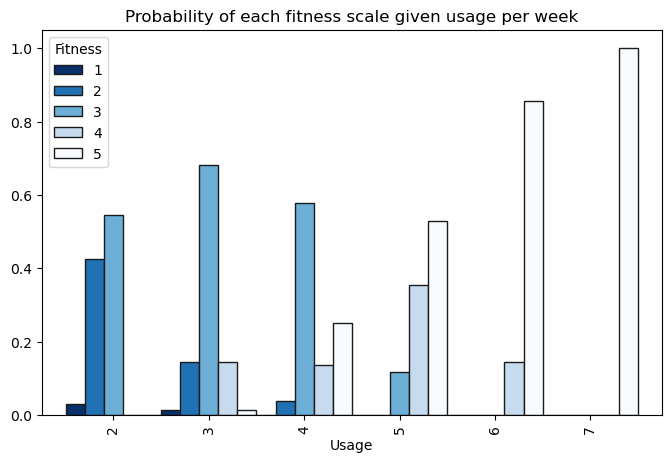

In [88]:
fgu = df_fitness_usage.plot(kind="bar",colormap='Blues_r',edgecolor='0.1',width=1, figsize=(8, 5))
plt.title('Probability of each fitness scale given usage per week')
plt.show()

### Calculate the expected price received for selling 100 treadmills

In [89]:
a=df['Product'].value_counts(normalize=True).reset_index().round(3)
a

,index,Product
0,KP281,0.444
1,KP481,0.333
2,KP781,0.222


In [90]:
price=[1500,1750,2500]
j=0
expected=0
for i in a['Product']:
    expected = expected + (i*price[j])
    j+=1
total = expected*100    
print('Expected price for selling 100 treadmills is : $',total)

Expected price for selling 100 treadmills is : $ 180375.0


After customers purchase 100 products, the total expected price received by the seller is around :  **$180375.00** dollars

## Insights and Recommendations 
1. Equal number of males and females have purchased KP281 product and almost same for the product KP481. Most of the Male customers have purchased the KP781 product : Advertise about product KP781 among female customers
2. Females planning to use treadmill 3 to 4 times a week, are more likely to buy KP481 product
3. Most of the people could attain fitness level of scale 3 By using machine KP281. Eventhough KP781 is expensive, its users have more fitness compared to other products
4. The products are targeted for customers within age 18 to 45 years. However most of the customers are in between 20 to 30 years old : We should make awreness about the products among people based on the age limits
5. Customer who are partnered, is more likely to purchase the product. They give more importance to health after getting married : We can recommend more products among partnered users
6. Higher the Income of the customer (Income >= 60000), higher the chances of the customer to purchase the KP781 product
7. Fitness increase with product usage per week and miles running per week. With increase in income, miles running per week also incresed : Rich people focus on being healthy. So, sell more KP781 products to high income customers
8. Increse in education results in increased miles running per week. This means that educated people understand importance of getting in shape : So, sell more KP781 products to highly educated customers. Also make awareness for less educated customers
9. If the customer expects to walk/run greater than 120 Miles per week, it is more likely that the customer will buy KP781 product
10. For customers running 50 to 150 miles per week, they prefer products KP281, KP481. For long runners 150 to 300 miles per week, they prefer product is KP781 : So, for facilities like gym, rehabilitation centres, etc,. we could recommend the product KP781
11. The more the customer is fit (fitness >= 3), higher the chances of the customer to purchase the KP781 product
12. Fitness increases with increase in product usage per week. Customers those use the product KP781 have achieved highest fitness levels : Recommend people to increase usage per week and recommend this product KP781
13. Customers who are planning to use the treadmill greater than 4 times a week, are more likely to purchase the KP781 product. While the other customers are likely to purchasing KP281 or KP481.
14. Probability of highest fitness level for given usage per week at 6 & 7 weeks is attained at 1. Which means all such users are in good fitness. All customers with usage per week 5 or more have higher probability of good fitness : More usage per week results in good fitness. Give awareness to customers to sell more KP481 and KP781 products
15. The probability for product KP781 given age from 18 to 30 is almost same. It goes way higher for older people at age of 46 to 54 : So,we should recommend more KP781 for customers from all age group
16. After customers purchase 100 products, the total expected price received by the seller is $180375.00 dollars : By recommending more sales in products KP481 and KP781 we can improve the total revenue


